# 项目：TMDB电影数据集分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
>对数据集中包含的 1 万多条电影信息进行分析，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房等内容。

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [139]:
# 加载数据并检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv("tmdb-movies.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


该数据集包含21列、10866行数据，其中数列有缺失值。
`cast` `genres` `production_companies`列中因为包含多个值而用|分隔。


### 数据清理

#### 移除不需要的列

In [140]:
del_col=['budget','revenue', 'tagline','keywords','homepage', 'overview']
df= df.drop(del_col,1)

#### 删除重复值

In [141]:
df.duplicated()
df.drop_duplicates(subset=['id'],inplace=True) 

#### 处理零值

In [142]:
df['budget_adj'].replace(0,np.NaN,inplace=True)
df['revenue_adj'].replace(0,np.NaN,inplace=True)
df['runtime'].replace(0,np.NaN,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 1.3+ MB


`budget_adj`及`revenue_adj`列存在5696项零值，需要清理，替换零为空值以避免影响后续分析

#### 增加两列`margin` `ROI`以体现利润和回报率

In [143]:
df['margin']= df.revenue_adj - df.budget_adj
df['ROI'] = df.margin/(df.budget_adj)
df.sort_values(['ROI'],ascending=False)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,margin,ROI
10495,8856,tt0091326,0.772494,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,6/18/86,211,5.8,1986,2.248029e+02,2.289886e+08,2.289884e+08,1.018618e+06
6179,11338,tt0089346,0.132713,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,John Landis,115.0,Comedy|Drama|Thriller,Universal Pictures,2/15/85,24,6.1,1985,2.310969e+02,1.358201e+07,1.358178e+07,5.877093e+04
3608,50217,tt0893412,0.463510,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,Angel Gracia,107.0,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,47,5.2,2011,9.015402e+01,2.423495e+06,2.423405e+06,2.688072e+04
7447,23827,tt1179904,1.120442,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86.0,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,714,6.1,2007,1.577503e+04,2.033462e+08,2.033304e+08,1.288939e+04
2449,2667,tt0185937,0.934621,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81.0,Horror|Mystery,Artisan Entertainment|Haxan Films,7/14/99,522,6.3,1999,3.272632e+04,3.246451e+08,3.246124e+08,9.919000e+03
3581,59296,tt1436559,0.520430,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,9.693980e-01,1.335831e+03,1.334861e+03,1.377000e+03
1354,985,tt0074486,0.331417,Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,David Lynch,89.0,Science Fiction|Fantasy|Horror|Drama,American Film Institute (AFI)|Libra Films,3/19/77,194,7.1,1977,3.597781e+04,2.518447e+07,2.514849e+07,6.990000e+02
7277,692,tt0069089,0.412913,Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,93.0,Comedy,Dreamland Productions,3/12/72,51,6.3,1972,6.257473e+04,3.128737e+07,3.122479e+07,4.990000e+02
7178,9372,tt0390521,0.263897,Super Size Me,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,Morgan Spurlock,100.0,Documentary|Comedy|Drama,Kathbur Pictures,1/17/04,295,6.5,2004,7.503895e+04,3.298837e+07,3.291333e+07,4.386166e+02
242,299245,tt2309260,0.532205,The Gallows,Cassidy Gifford|Ryan Shoos|Pfeifer Brown|Reese...,Travis Cluff|Chris Lofing,87.0,Horror|Thriller,New Line Cinema|Blumhouse Productions|Manageme...,7/10/15,247,5.0,2015,9.199996e+04,3.925124e+07,3.915924e+07,4.256441e+02


#### 清理 | 分隔的列 `genres`

In [144]:
#先将|连结的各项分离开，转置
df_genres=df.copy()
#pd.set_option('display.multi_sparse', False)
s = df_genres['genres'].str.split('|').apply(pd.Series,1).stack()
s.name='Genre'
s.head()

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
Name: Genre, dtype: object

In [145]:
#与原dataset联接
df_genres = df_genres.join(s.reset_index(drop=True,level=1))
df_genres[['original_title','genres','Genre']].head()

,original_title,genres,Genre
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Action
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Adventure
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Science Fiction
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Thriller
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Action


#### 清理 | 分隔的列 `cast`

In [146]:
df_cast=df.copy()

c = df_cast['cast'].str.split('|').apply(pd.Series,1).stack()
c.name='Cast'

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 单变量分析
#### 1. 电影产量随时间的变化

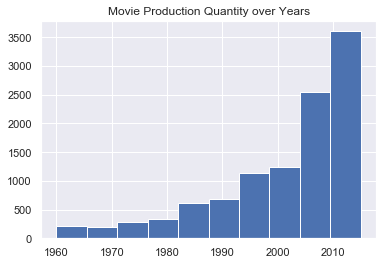

In [147]:
df['release_year'].hist()
plt.title('Movie Production Quantity over Years');

#### 2.评价最高的10部科幻电影

In [148]:
df[df['genres'].str.contains("Science Fiction",na=False)].sort_values(['vote_average'],ascending=False)[['original_title','release_year','vote_average']].head(10)

,original_title,release_year,vote_average
1200,Black Mirror: White Christmas,2014,8.8
611,World of Tomorrow,2015,8.2
7309,The Empire Strikes Back,1980,8.0
629,Interstellar,2014,8.0
553,Doctor Who: The Husbands of River Song,2015,8.0
1895,Doctor Who: The Waters of Mars,2009,8.0
5611,Doctor Who: The Day of the Doctor,2013,8.0
630,Guardians of the Galaxy,2014,7.9
1879,Doctor Who: The End of Time,2009,7.9
1149,Doctor Who: Last Christmas,2014,7.9


#### 3. 最受欢迎的10部电影

In [149]:
df.sort_values(['popularity'],ascending=False)[['original_title','release_year','popularity','vote_average','genres']].head(10)

,original_title,release_year,popularity,vote_average,genres
0,Jurassic World,2015,32.985763,6.5,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,2015,28.419936,7.1,Action|Adventure|Science Fiction|Thriller
629,Interstellar,2014,24.949134,8.0,Adventure|Drama|Science Fiction
630,Guardians of the Galaxy,2014,14.311205,7.9,Action|Science Fiction|Adventure
2,Insurgent,2015,13.112507,6.3,Adventure|Science Fiction|Thriller
631,Captain America: The Winter Soldier,2014,12.971027,7.6,Action|Adventure|Science Fiction
1329,Star Wars,1977,12.037933,7.9,Adventure|Action|Science Fiction
632,John Wick,2014,11.422751,7.0,Action|Thriller
3,Star Wars: The Force Awakens,2015,11.173104,7.5,Action|Adventure|Science Fiction|Fantasy
633,The Hunger Games: Mockingjay - Part 1,2014,10.739009,6.6,Science Fiction|Adventure|Thriller


#### 4.最勤劳的演员Top10

In [150]:
c.value_counts(ascending=False).head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
Name: Cast, dtype: int64

### 多变量分析
#### 1. 散点矩阵

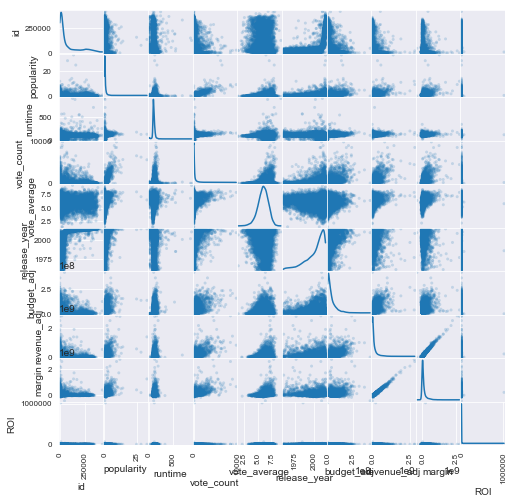

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(8,8), diagonal='kde');

#### 2. 评分随时间的变化

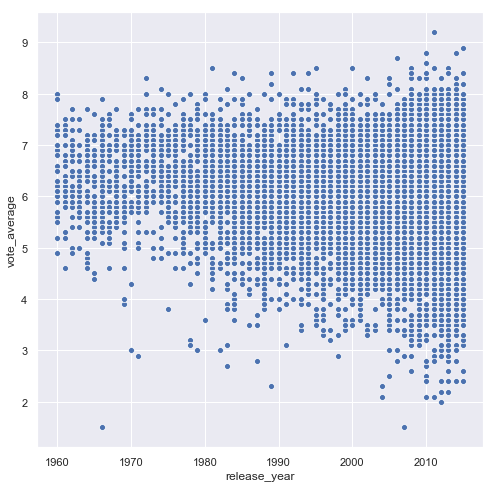

In [151]:
sns.set()
plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='release_year', y='vote_average');
#plt.legend(loc='upper right');

根据图中结果可看出，随着时间推移，对电影的评分范围越广，从1960年代集中于6、7、8分，到现在从3-8分都有广泛分布。

#### 3.最受欢迎的Genre

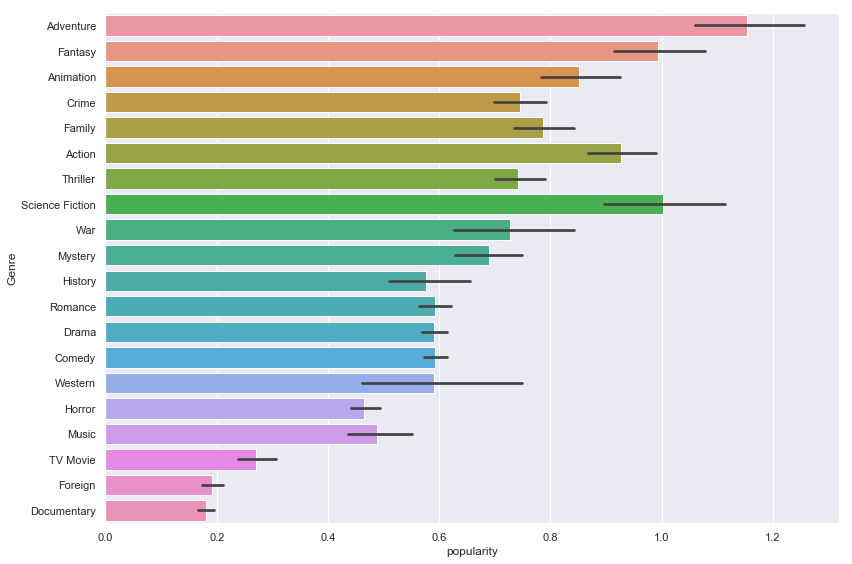

In [152]:
sns.set()
plt.subplots(figsize=(12,8))
result = df_genres.groupby(["Genre"])['popularity'].aggregate(np.median).reset_index().sort_values('popularity',ascending=False)
sns.barplot(data=df_genres, y='Genre', x='popularity',order=result['Genre']);
plt.tight_layout()

### 研究问题 1（电影的投资与回报相关性分析）

In [153]:
df.sort_values(['ROI'],ascending=False)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,margin,ROI
10495,8856,tt0091326,0.772494,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,6/18/86,211,5.8,1986,2.248029e+02,2.289886e+08,2.289884e+08,1.018618e+06
6179,11338,tt0089346,0.132713,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,John Landis,115.0,Comedy|Drama|Thriller,Universal Pictures,2/15/85,24,6.1,1985,2.310969e+02,1.358201e+07,1.358178e+07,5.877093e+04
3608,50217,tt0893412,0.463510,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,Angel Gracia,107.0,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,47,5.2,2011,9.015402e+01,2.423495e+06,2.423405e+06,2.688072e+04
7447,23827,tt1179904,1.120442,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86.0,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,714,6.1,2007,1.577503e+04,2.033462e+08,2.033304e+08,1.288939e+04
2449,2667,tt0185937,0.934621,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81.0,Horror|Mystery,Artisan Entertainment|Haxan Films,7/14/99,522,6.3,1999,3.272632e+04,3.246451e+08,3.246124e+08,9.919000e+03
3581,59296,tt1436559,0.520430,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,9.693980e-01,1.335831e+03,1.334861e+03,1.377000e+03
1354,985,tt0074486,0.331417,Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,David Lynch,89.0,Science Fiction|Fantasy|Horror|Drama,American Film Institute (AFI)|Libra Films,3/19/77,194,7.1,1977,3.597781e+04,2.518447e+07,2.514849e+07,6.990000e+02
7277,692,tt0069089,0.412913,Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,93.0,Comedy,Dreamland Productions,3/12/72,51,6.3,1972,6.257473e+04,3.128737e+07,3.122479e+07,4.990000e+02
7178,9372,tt0390521,0.263897,Super Size Me,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,Morgan Spurlock,100.0,Documentary|Comedy|Drama,Kathbur Pictures,1/17/04,295,6.5,2004,7.503895e+04,3.298837e+07,3.291333e+07,4.386166e+02
242,299245,tt2309260,0.532205,The Gallows,Cassidy Gifford|Ryan Shoos|Pfeifer Brown|Reese...,Travis Cluff|Chris Lofing,87.0,Horror|Thriller,New Line Cinema|Blumhouse Productions|Manageme...,7/10/15,247,5.0,2015,9.199996e+04,3.925124e+07,3.915924e+07,4.256441e+02


#### `budget_adj` `revenue_adj`中有不少异常值，需要先作四分位差处理

In [154]:
#因存在多个需要处理的列，先编写函数

def IQR(df,col):
    
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    Upper = df[col].quantile(.75)+1.5*IQR
    Lower = df[col].quantile(.25)-1.5*IQR
    print("IQR: {}, Upper:{}, Lower:{}".format(IQR,Upper,Lower))
    df_IQR = df.query(col + ' > @Lower & ' + col + ' < @Upper')
    df_IQR[col].plot(kind="box");
    
    return df_IQR

IQR: 48465791.40652393, Upper:130862569.66527417, Lower:-63000595.96082152


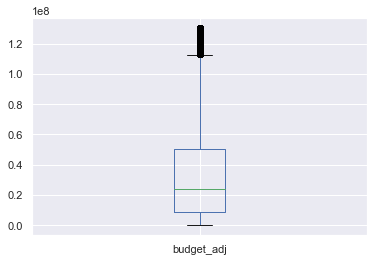

In [155]:
df_IQR = IQR(df_genres,'budget_adj')

IQR: 132061342.4984528, Upper:348573416.41480017, Lower:-179671953.579011


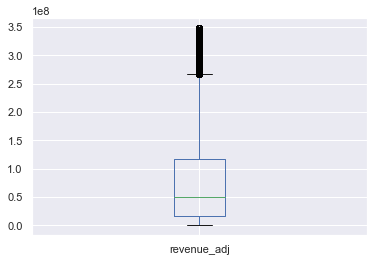

In [156]:
df_IQR = IQR(df_IQR,'revenue_adj')

IQR: 2.590742925, Upper:6.220223612500002, Lower:-4.142748087499998


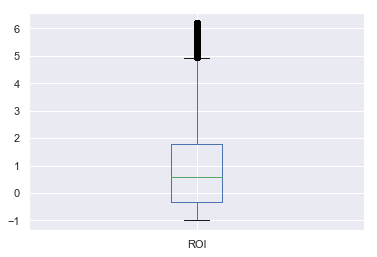

In [157]:
df_IQR = IQR(df_IQR,'ROI')
df_IQR['ROI'].plot(kind='box');

#### 发现计算出的ROI仍然有不少异常值，再处理一次

#### 将`budget_adj`分为5个标签段

In [158]:
labels=['very low','low','medium','high','very high']
df_IQR['budget_label']=pd.cut(df_IQR['budget_adj'],bins = 5, labels=labels)
df_IQR.groupby(['budget_label']).count()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,margin,ROI,Genre
budget_label,,,,,,,,,,,,,,,,,,
very low,3338,3338,3338,3338,3330,3334,3338,3338,3242,3338,3338,3338,3338,3338,3338,3338,3338,3338
low,2358,2358,2358,2358,2358,2358,2358,2358,2351,2358,2358,2358,2358,2358,2358,2358,2358,2358
medium,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167
high,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790
very high,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331


#### 以柱状图显示投资额、利润和投资回报率的关系

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


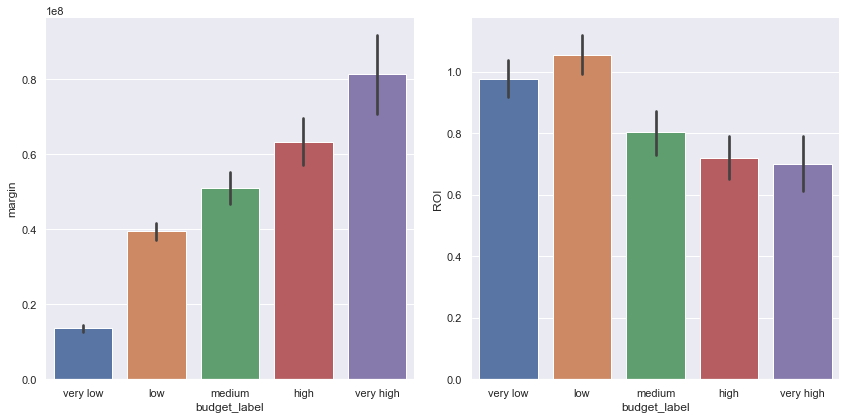

In [159]:
sns.set()
f,axes = plt.subplots(1,2,figsize=(12,6),sharex=True)
sns.despine(left=True)
sns.barplot(data=df_IQR, x='budget_label', y='margin',ax=axes[0]);
sns.barplot(data=df_IQR, x='budget_label', y='ROI',ax=axes[1]);
plt.tight_layout()
#plt.legend(loc='upper right')

- 观察到的现象：总体上利润随投资额升高而升高；
- 而同时总体上投资额越高，投资回报率越小，回报率最高的落在投资额low一级上

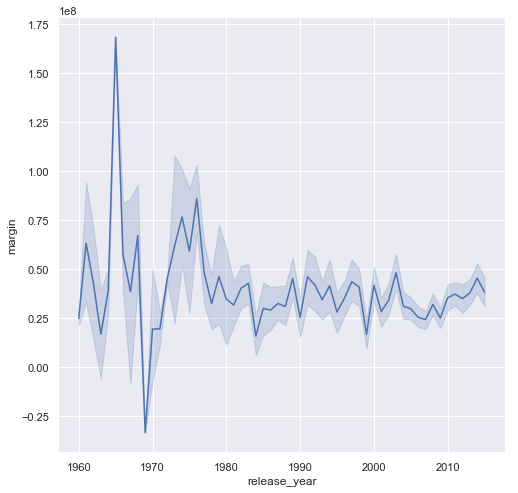

In [162]:
sns.set()
plt.subplots(figsize=(8,8))
sns.lineplot(data=df_IQR,x='release_year',y='margin');

- 可看出早期回报率起伏较大，80年代后趋于稳定

### 研究问题 2（半个多世纪以来电影的变化）

#### 1.投资回报的变化

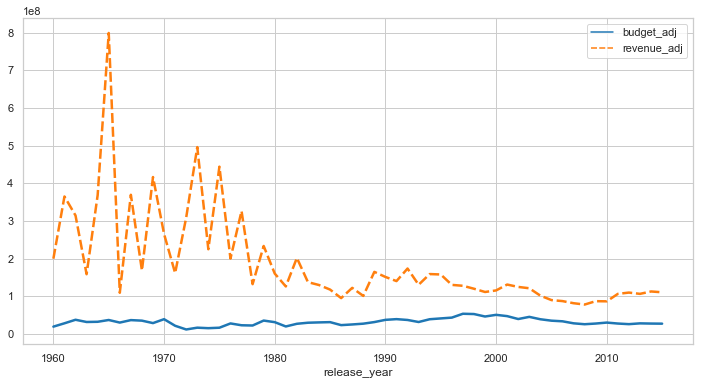

In [137]:
sns.set(style="whitegrid")
plt.subplots(figsize=(12,6))
df_num = df_IQR.groupby(['release_year'])['budget_adj','revenue_adj'].mean()
sns.lineplot(data=df_num, palette="tab10", linewidth=2.5);

#### 观察结论
>投资相对稳定，回报在经历初期大幅度起落后归于平稳

#### 2. 电影时长和评分

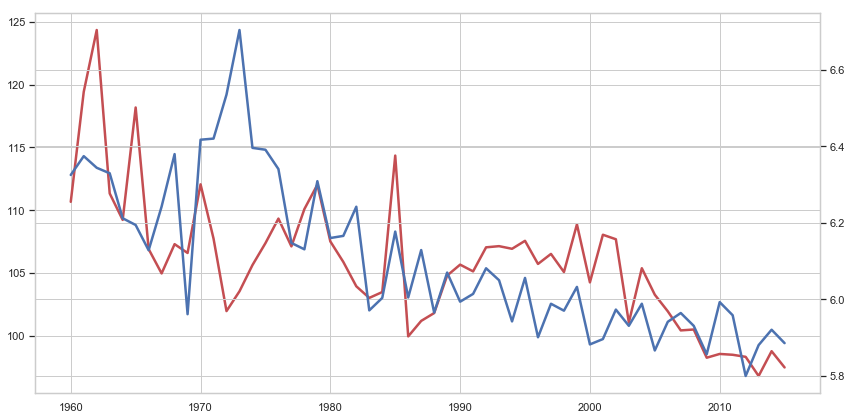

In [94]:
plt.subplots(figsize=(12,6),sharex=True)

sns.lineplot(data=df.groupby(['release_year'])['runtime'].mean(), palette="tab10", color='r',linewidth=2.5);
ax2 = plt.twinx()
sns.lineplot(data=df.groupby(['release_year'])['vote_average'].mean(), palette="tab10", linewidth=2.5,ax=ax2);
plt.tight_layout()

#### 观察结论
>电影时长越来越短，平均评分也持续走低。关于评分走低是因为低质量电影越来越多，还是观众评分习惯变化使然，还需要进一步分析。

#### 3.电影类别变化

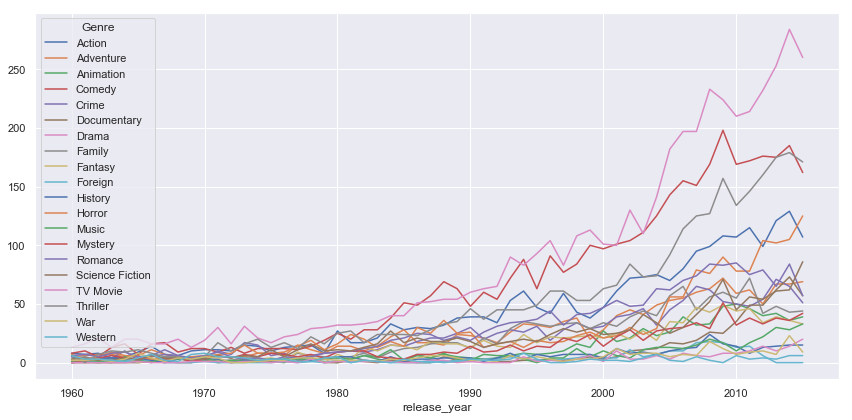

In [210]:
s = df_genres.groupby(['release_year'])['Genre'].value_counts().unstack().fillna(0)
s.plot(kind='line',figsize=(12,6));
plt.tight_layout()

#### 观察结论
>各类别总体上维持了自己的比例，Drame和Comedy一直是拍摄数量最多的影片类别

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

## 参考资料

http://seaborn.pydata.org
https://stackoverflow.com/questions/49809027/matplotlib-subplots-too-many-indices-for-array?noredirect=1&lq=1
https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
https://stackoverflow.com/questions/47591650/second-y-axis-time-series-seaborn
